<a href="https://colab.research.google.com/github/laussin86/laussin86/blob/main/Airline_Customer_Satisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn as sn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import (train_test_split,
                                     cross_val_score,
                                     RandomizedSearchCV,
                                     GridSearchCV)
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score,
                             f1_score,
                             precision_score,
                             recall_score,
                             RocCurveDisplay,
                             precision_recall_curve,
                             average_precision_score,
                             roc_auc_score,
                             roc_curve,auc)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import (train_test_split,
                                     cross_val_score,
                                     RandomizedSearchCV,
                                     GridSearchCV)
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder

In [22]:
#1. Check the datatypes of the attributes.
df = pd.read_csv("/content/drive/MyDrive/BCG/Airline_customer_satisfaction.csv")
df.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

In [24]:
#2. Are there any missing values in the dataset?
df.isnull().sum()

satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [25]:
# as missing value are few we can drop it
df = df.dropna(axis=0).reset_index(drop = True)

In [26]:
df.duplicated().sum()

0

In [27]:
df['satisfaction'] = OneHotEncoder(drop='first').fit_transform(df[['satisfaction']]).toarray()

In [28]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
satisfaction,129487.0,0.547406,0.497749,0.0,0.0,1.0,1.0,1.0
Age,129487.0,39.428761,15.117597,7.0,27.0,40.0,51.0,85.0
Flight Distance,129487.0,1981.008974,1026.884131,50.0,1359.0,1924.0,2543.0,6951.0
Seat comfort,129487.0,2.838586,1.392873,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,129487.0,2.990277,1.527183,0.0,2.0,3.0,4.0,5.0
Food and drink,129487.0,2.852024,1.443587,0.0,2.0,3.0,4.0,5.0
Gate location,129487.0,2.990377,1.305917,0.0,2.0,3.0,4.0,5.0
Inflight wifi service,129487.0,3.249160,1.318765,0.0,2.0,3.0,4.0,5.0
Inflight entertainment,129487.0,3.383745,1.345959,0.0,2.0,4.0,4.0,5.0
Online support,129487.0,3.519967,1.306326,0.0,3.0,4.0,5.0,5.0


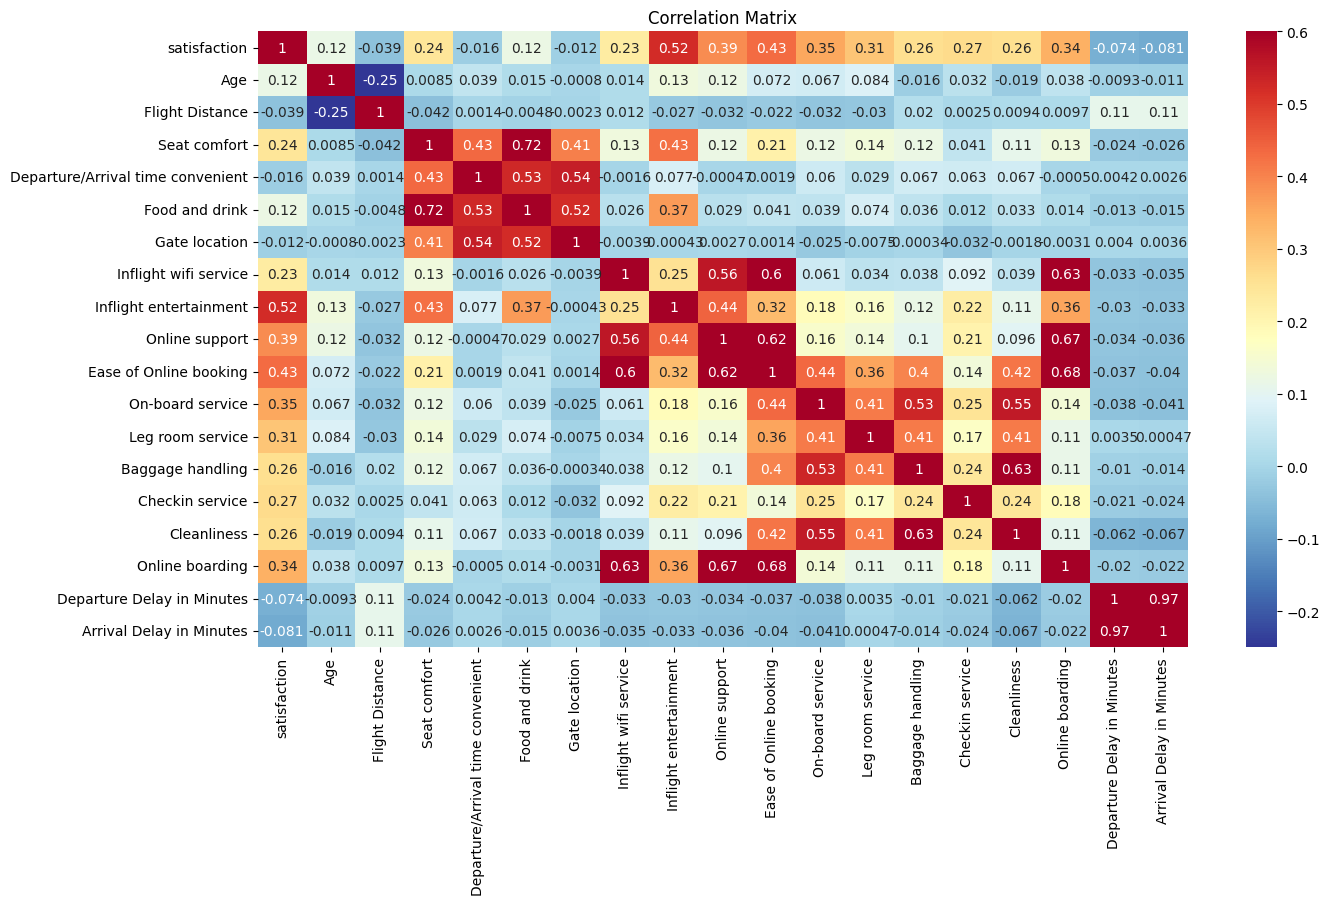

In [30]:
# correlation matrix
plt.figure(figsize=(15, 8))
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corrMatrix = numeric_df.corr()
sn.heatmap(corrMatrix, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot=True, vmax = 0.6)
plt.title('Correlation Matrix')
plt.show()

In [31]:
# Convert some features to object type
columns_to_convert= ['Seat comfort','Departure/Arrival time convenient','Food and drink','Gate location','Inflight wifi service','Inflight entertainment','Online support','Ease of Online booking','On-board service','Leg room service','Baggage handling',
                   'Checkin service','Cleanliness','Online boarding']
df[columns_to_convert] = df[columns_to_convert].astype(object)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129487 entries, 0 to 129486
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129487 non-null  float64
 1   Customer Type                      129487 non-null  object 
 2   Age                                129487 non-null  int64  
 3   Type of Travel                     129487 non-null  object 
 4   Class                              129487 non-null  object 
 5   Flight Distance                    129487 non-null  int64  
 6   Seat comfort                       129487 non-null  object 
 7   Departure/Arrival time convenient  129487 non-null  object 
 8   Food and drink                     129487 non-null  object 
 9   Gate location                      129487 non-null  object 
 10  Inflight wifi service              129487 non-null  object 
 11  Inflight entertainment             1294

In [33]:
df.shape

(129487, 22)

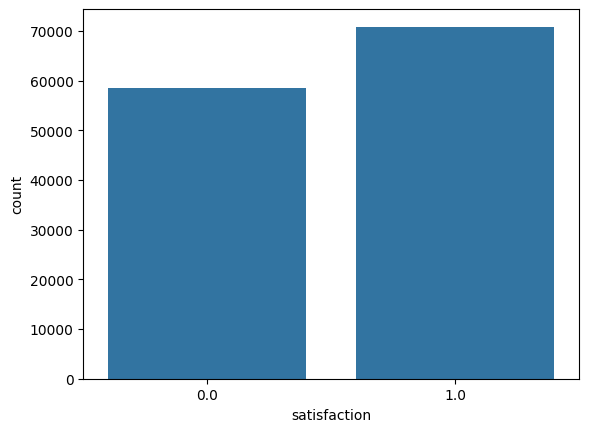

In [34]:
#4. Graph the frequency of loan status with fully paid and not
ax = sns.countplot(x="satisfaction",data=df)



In [ ]:
#PREPROCESSING AND EXPLORATORY ANALYSIS

In [14]:
len(df['Customer Type'].unique())

2

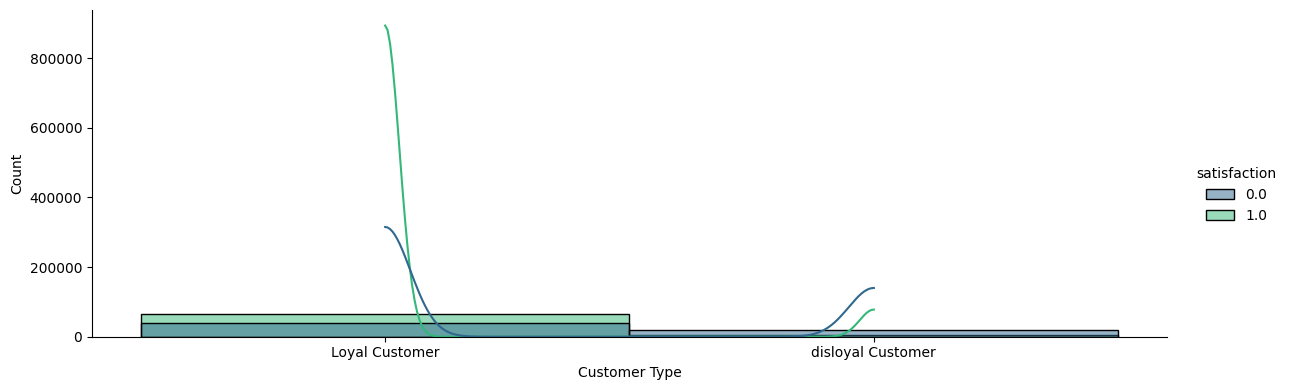

In [15]:
# lets check the purpose of people who defaulted their loan vs did not.
sns.displot(data=df, x='Customer Type', hue='satisfaction', bins=100, height=4, aspect=3, kde=True, palette='viridis');

In [16]:
from itertools import groupby
#let check % of people satisfaction
cust_satis = df[df['satisfaction']==1].groupby("Customer Type").count()['satisfaction']
cust_not_satis = df[df['satisfaction']==0].groupby("Customer Type").count()['satisfaction']
per_satis = (cust_satis * 100)/(cust_satis + cust_not_satis)
per_satis

Customer Type
Loyal Customer       61.635767
disloyal Customer    23.985831
Name: satisfaction, dtype: float64

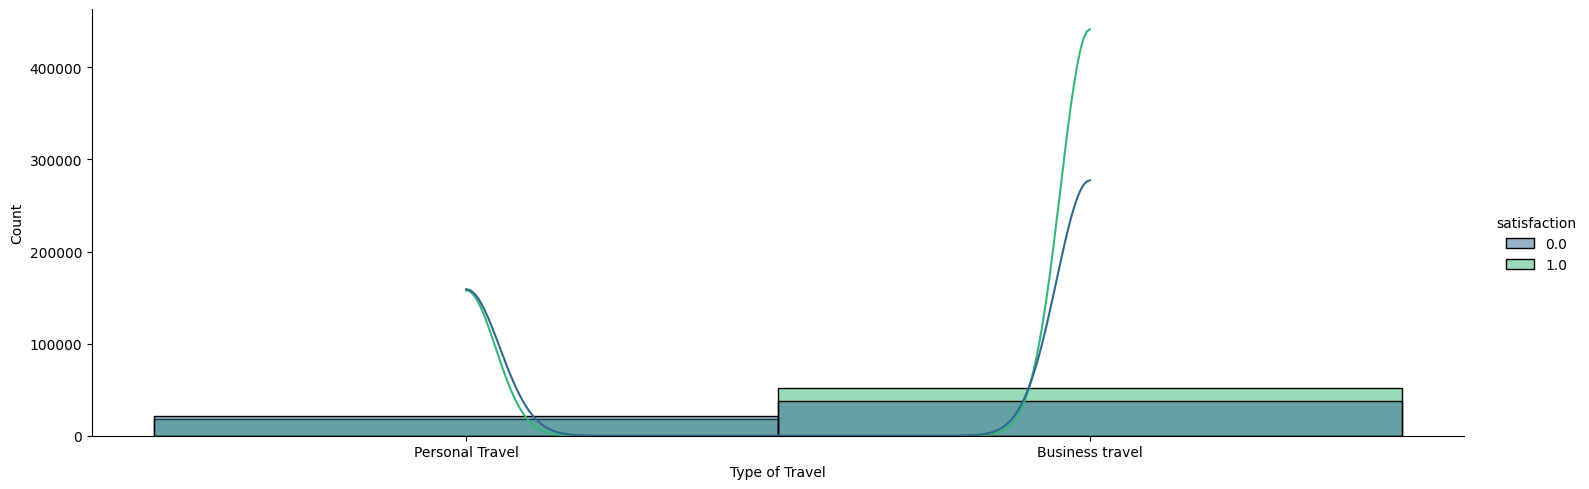

In [17]:
sns.displot(data=df, x='Type of Travel', hue='satisfaction', bins=100, height=5, aspect=3, kde=True, palette='viridis');

In [18]:
Travel_type_satis = df[df['satisfaction']==1].groupby("Type of Travel").count()['satisfaction']
Travel_type_not_satis = df[df['satisfaction']==0].groupby("Type of Travel").count()['satisfaction']
perc_type_satis = (Travel_type_satis * 100)/(Travel_type_satis + Travel_type_not_satis)
perc_type_satis

Type of Travel
Business travel    58.367712
Personal Travel    46.638530
Name: satisfaction, dtype: float64

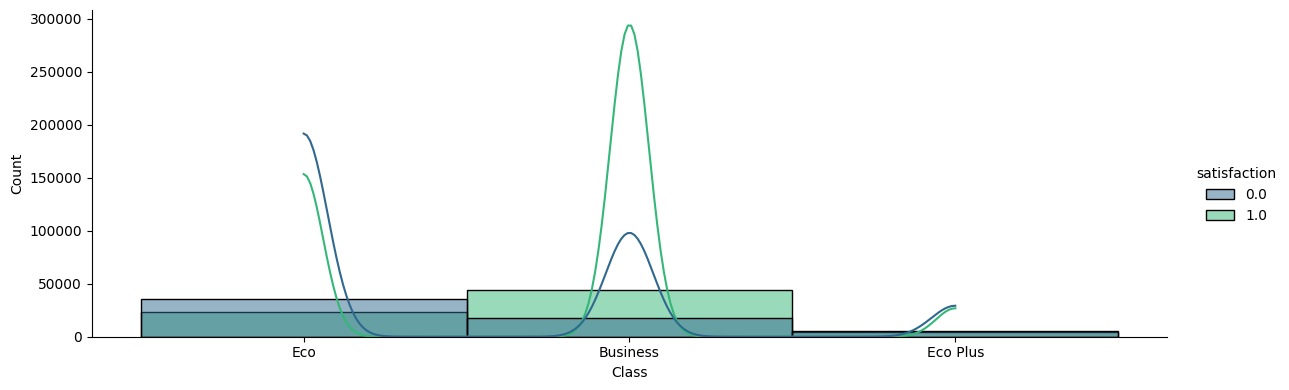

In [19]:
sns.displot(data=df, x='Class', hue='satisfaction', bins=100, height=4, aspect=3, kde=True, palette='viridis');

In [20]:
Class_satis = df[df['satisfaction']==1].groupby("Class").count()['satisfaction']
Class_not_satis = df[df['satisfaction']==0].groupby("Class").count()['satisfaction']
perc_Class_satis = (Class_satis * 100)/(Class_satis + Class_not_satis)
perc_Class_satis

Class
Business    70.942087
Eco         39.399831
Eco Plus    42.718550
Name: satisfaction, dtype: float64

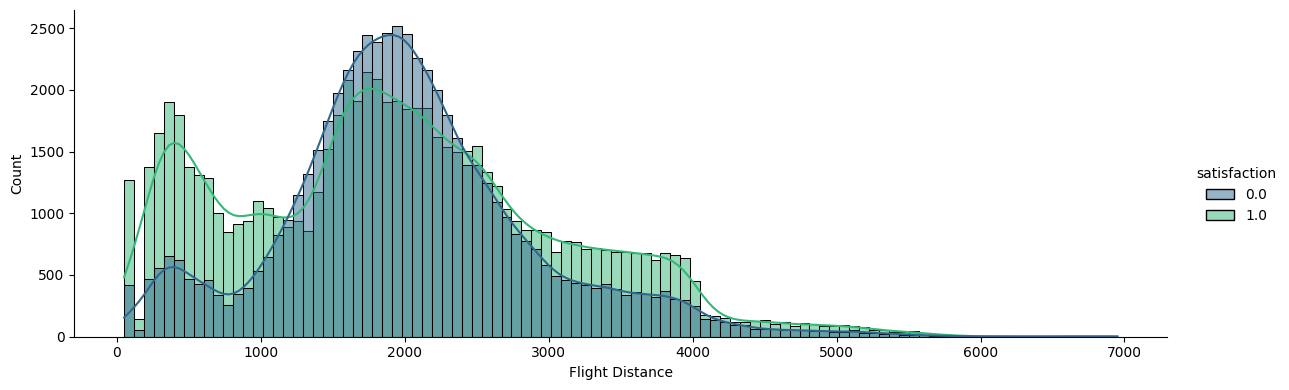

In [37]:
sns.displot(data=df, x='Flight Distance', hue='satisfaction', bins=100, height=4, aspect=3, kde=True, palette='viridis');

In [38]:
df.groupby('satisfaction')['Flight Distance'].describe()

,count,mean,std,min,25%,50%,75%,max
satisfaction,,,,,,,,
0.0,58605.0,2025.202833,887.962558,50.0,1519.0,1954.0,2461.0,6951.0
1.0,70882.0,1944.469640,1127.605582,50.0,1070.0,1885.0,2626.0,6950.0


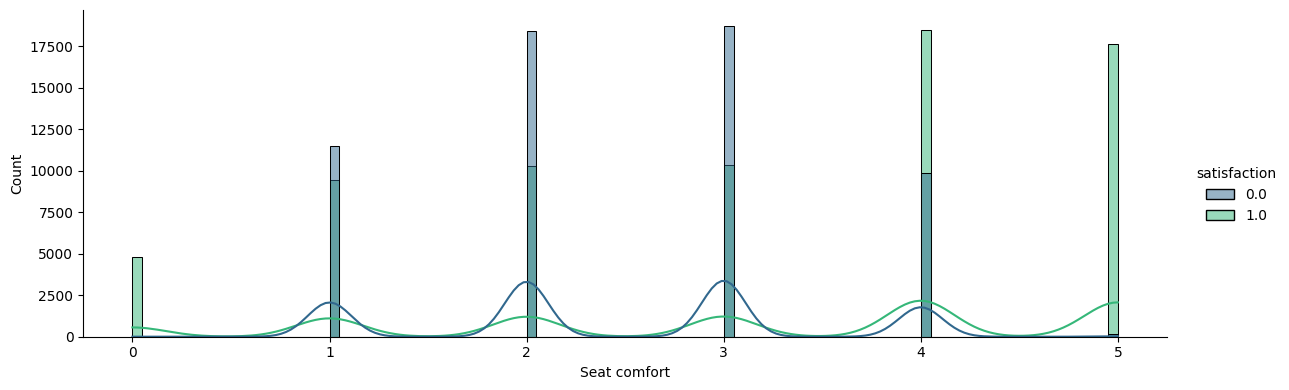

In [39]:
#let's check the distribution of months of inquiry with default or not
sns.displot(data=df, x='Seat comfort',hue='satisfaction', bins=100, height=4, aspect=3, kde=True, palette='viridis')


In [40]:
Seat_satis = df[df['satisfaction']==1].groupby("Seat comfort").count()['satisfaction']
Seat_not_satis = df[df['satisfaction']==0].groupby("Seat comfort").count()['satisfaction']
perc_seat_satis = (Seat_satis * 100)/(Seat_satis + Seat_not_satis)
perc_seat_satis


Seat comfort
0    99.790839
1    45.091466
2    35.779368
3    35.613143
4    65.184531
5    99.206439
Name: satisfaction, dtype: float64

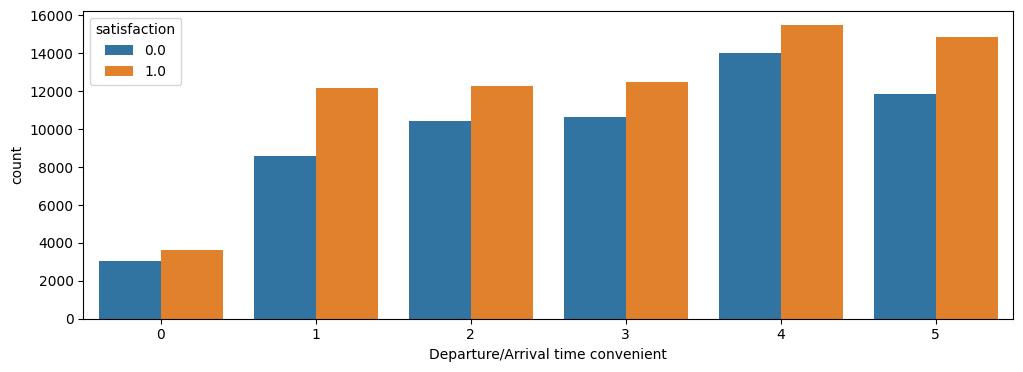

In [41]:
#let's check distribution of credit policy by loan status
plt.figure(figsize=(12,4))
ax = sns.countplot(x="Departure/Arrival time convenient",data=df,hue='satisfaction')

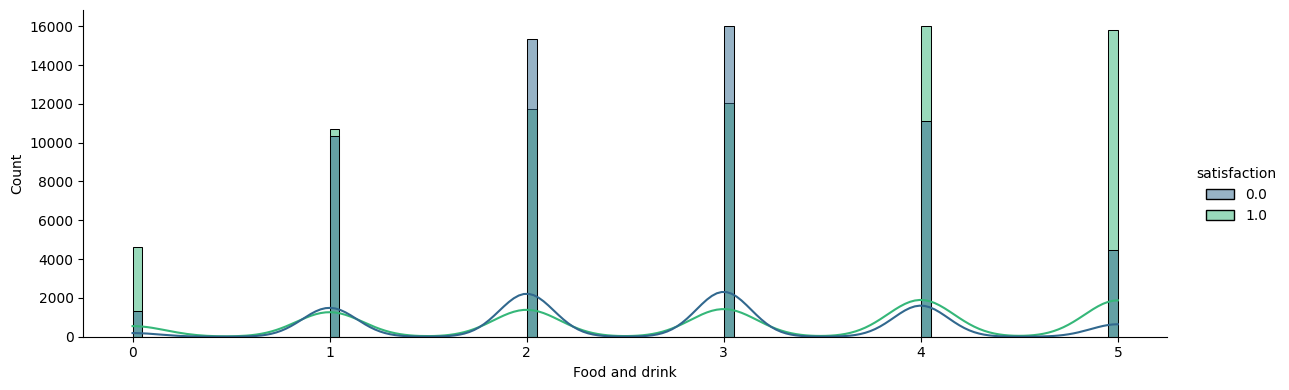

In [42]:
sns.displot(data=df, x='Food and drink',hue='satisfaction', bins=100, height=4, aspect=3, kde=True, palette='viridis')

In [43]:
# let's check percentage of charged off
Food_satis = df[df['satisfaction']==1].groupby("Food and drink").count()['satisfaction']
Food_nosatis = df[df['satisfaction']==0].groupby("Food and drink").count()['satisfaction']
perce_Food_satis = (Food_satis * 100)/(Food_satis + Food_nosatis)
perce_Food_satis

Food and drink
0    77.963526
1    50.847296
2    43.271290
3    42.861215
4    59.025397
5    78.008381
Name: satisfaction, dtype: float64

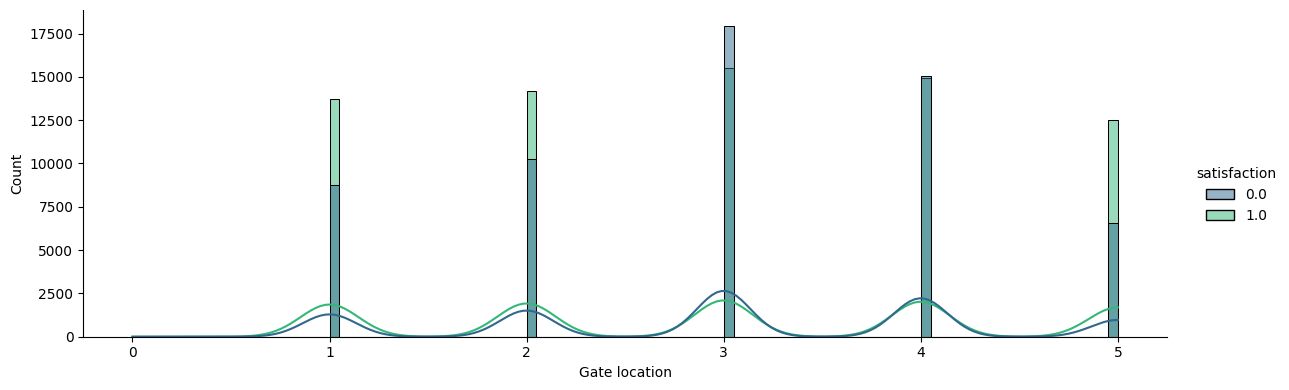

In [44]:
sns.displot(data=df, x='Gate location',hue='satisfaction', bins=100, height=4, aspect=3, kde=True, palette='viridis')

In [45]:
Gate_satis = df[df['satisfaction']==1].groupby("Gate location").count()['satisfaction']
Gate_nosatis = df[df['satisfaction']==0].groupby("Gate location").count()['satisfaction']
percen_Gate_satis = (Gate_satis * 100)/(Gate_satis + Gate_nosatis)
percen_Gate_satis

Gate location
0          NaN
1    61.092590
2    58.070455
3    46.306538
4    49.784978
5    65.547934
Name: satisfaction, dtype: float64

In [46]:
#depature delay and arrival delay are highly corrolated so dropping one.
df = df.drop(columns=['Departure Delay in Minutes'])

In [47]:
#one hot-encoding
df = pd.get_dummies(df)

In [48]:
display(df.head())

,satisfaction,Age,Flight Distance,Arrival Delay in Minutes,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,...,Cleanliness_2,Cleanliness_3,Cleanliness_4,Cleanliness_5,Online boarding_0,Online boarding_1,Online boarding_2,Online boarding_3,Online boarding_4,Online boarding_5
0,1.0,65,265,0.0,True,False,False,True,False,True,...,False,True,False,False,False,False,True,False,False,False
1,1.0,47,2464,305.0,True,False,False,True,True,False,...,False,True,False,False,False,False,True,False,False,False
2,1.0,15,2138,0.0,True,False,False,True,False,True,...,False,False,True,False,False,False,True,False,False,False
3,1.0,60,623,0.0,True,False,False,True,False,True,...,False,False,False,False,False,False,False,True,False,False
4,1.0,70,354,0.0,True,False,False,True,False,True,...,True,False,False,False,False,False,False,False,False,True


In [ ]:
#SCALING AND TRAIN TEST SPLITING

In [49]:
# lets first check the final dimension of our dataset after the preprocessing step
df.shape

(129487, 94)

In [50]:
# let's now split our dataset
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('satisfaction', axis=1), df[['satisfaction']],
    test_size=0.20, random_state=3)

In [51]:
# let's scale our train and test.
scaler = StandardScaler()
# We need to fit the scaler to our data before transformation
df.loc[:, df.columns != 'satisfaction'] = scaler.fit_transform(df.loc[:, df.columns != 'satisfaction'])


In [52]:
print(y_train.shape)
print(X_train.shape)

(103589, 1)
(103589, 93)


In [65]:
parameter_space = \
    {
        "max_depth": [4, 5, 6],
        "learning_rate": [0.005, 0.009, 0.01],
        "n_estimators": [700, 1000, 2500],
        "booster": ["gbtree",],
        "gamma": [7, 25, 100],
        "subsample": [0.3, 0.6],
        "colsample_bytree": [0.5, 0.7],
        "colsample_bylevel": [0.5, 0.7,],
        "reg_alpha": [1, 10, 33],
        "reg_lambda": [1, 3, 10],
    }

clf = RandomizedSearchCV(XGBClassifier(random_state=3),
                         parameter_space, cv=5, n_jobs=4,
                         scoring="accuracy",
                         random_state=3, n_iter=10)

clf.fit(X_train, y_train)
print("Best parameters:")
print(clf.best_params_)

Best parameters:
{'subsample': 0.6, 'reg_lambda': 3, 'reg_alpha': 10, 'n_estimators': 2500, 'max_depth': 6, 'learning_rate': 0.005, 'gamma': 7, 'colsample_bytree': 0.5, 'colsample_bylevel': 0.7, 'booster': 'gbtree'}


In [66]:
model = XGBClassifier(**clf.best_params_)

In [67]:
#XGBoost
#let's first fit the model to the train data
xgb_model= model.fit(X_train, y_train)

In [68]:
# now let's create the prediciton
preds = xgb_model.predict(X_test)

In [69]:
# The confusion Matrix
confusion_matrix(y_test,preds)

array([[11008,   623],
       [  885, 13382]])

In [70]:
#let's see now the metrics based on XGBoost
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94     11631
         1.0       0.96      0.94      0.95     14267

    accuracy                           0.94     25898
   macro avg       0.94      0.94      0.94     25898
weighted avg       0.94      0.94      0.94     25898



# Feature Importances

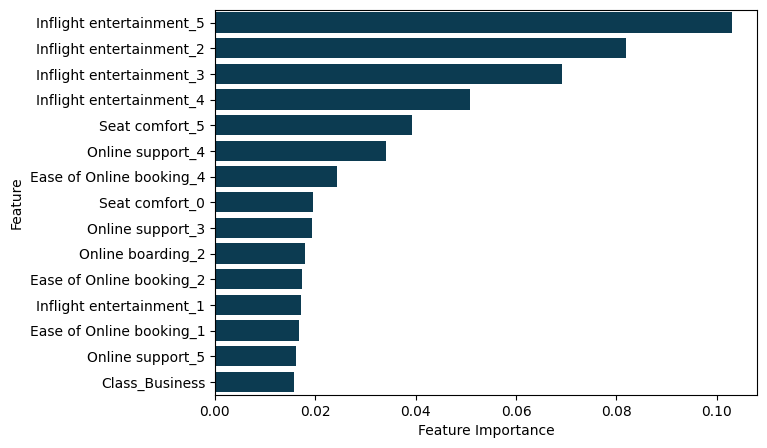

In [71]:

xgb_feature_importances = model.feature_importances_
xgb_feature_importances = pd.Series(xgb_feature_importances, index=X_train.columns)
xgb_feature_importances = xgb_feature_importances.sort_values(ascending=False).head(15)

fig, ax = plt.subplots(figsize=(7, 5))
sns.barplot(x=xgb_feature_importances,
            y=xgb_feature_importances.index,
            color="#003f5c");
plt.xlabel('Feature Importance');
plt.ylabel('Feature');

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import (train_test_split,
                                     cross_val_score,
                                     RandomizedSearchCV,
                                     GridSearchCV)
dt_classifier = DecisionTreeClassifier()

# Define the parameter grid for GridSearchCV
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV to find the best parameters
grid_search_dt = GridSearchCV(estimator=dt_classifier, param_grid=param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)

# Get the best Decision Tree classifier with optimal parameters
best_dt_classifier = grid_search_dt.best_estimator_

# Predict on the test set and evaluate performance
y_pred_dt = best_dt_classifier.predict(X_test)

In [54]:
confusion_matrix(y_test,y_pred_dt)

array([[11054,   577],
       [  886, 13381]])

In [55]:
#let's see now the metrics based on Decision tree
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94     11631
         1.0       0.96      0.94      0.95     14267

    accuracy                           0.94     25898
   macro avg       0.94      0.94      0.94     25898
weighted avg       0.94      0.94      0.94     25898



In [56]:
# Logistic Regression
log_reg = LogisticRegression()

# Define the parameter grid for GridSearchCV
param_grid_logreg = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Perform GridSearchCV to find the best parameters
grid_search_logreg = GridSearchCV(estimator=log_reg, param_grid=param_grid_logreg, scoring='accuracy', cv=5)
grid_search_logreg.fit(X_train, y_train)

# Get the best Logistic Regression model with optimal parameters
best_log_reg = grid_search_logreg.best_estimator_

# Evaluate the best model on the test set
y_pred_logreg = best_log_reg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [57]:
confusion_matrix(y_test,y_pred_logreg)

array([[10522,  1109],
       [ 1370, 12897]])

In [58]:
print(classification_report(y_test,y_pred_logreg))

              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89     11631
         1.0       0.92      0.90      0.91     14267

    accuracy                           0.90     25898
   macro avg       0.90      0.90      0.90     25898
weighted avg       0.90      0.90      0.90     25898



In [59]:
from sklearn.naive_bayes import GaussianNB
# Define the Naive Bayes (GaussianNB) classifier
nb_classifier = GaussianNB()

# No hyperparameter tuning for Naive Bayes, use default settings

# Train the classifier on the resampled training data
nb_classifier.fit(X_train, y_train)

# Predict on the test set and evaluate performance
y_pred_nb = nb_classifier.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [60]:
confusion_matrix(y_test,y_pred_nb)

array([[10366,  1265],
       [ 2378, 11889]])

In [61]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

         0.0       0.81      0.89      0.85     11631
         1.0       0.90      0.83      0.87     14267

    accuracy                           0.86     25898
   macro avg       0.86      0.86      0.86     25898
weighted avg       0.86      0.86      0.86     25898



In [72]:
#calculate AUC of model Xgboost
auc = metrics.roc_auc_score(y_test, preds)
print(auc)

0.9422024935030981


In [63]:
#calculate AUC of model logistic regression
auc = metrics.roc_auc_score(y_test, y_pred_logreg)
print(auc)

0.9043127844738235


In [64]:
#calculate AUC of model Naive Bayes (GaussianNB) classifier
auc = metrics.roc_auc_score(y_test, y_pred_nb)
print(auc)

0.8622802909038938


In [75]:
#calculate AUC of modeldecision tree classifier
auc = metrics.roc_auc_score(y_test, y_pred_dt)
print(auc)

0.9441449215848741


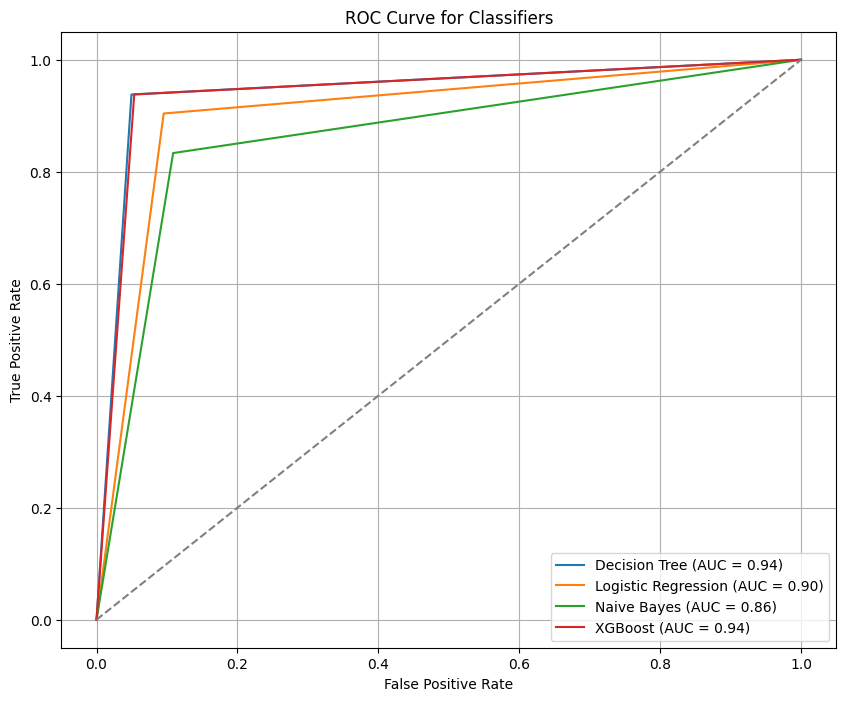

In [76]:
# Define a dictionary to store classifiers
classifiers = {
    'Decision Tree': best_dt_classifier,
    'Logistic Regression': best_log_reg,
    'Naive Bayes': nb_classifier,
    'XGBoost': model
}

# Create a figure for ROC curves
plt.figure(figsize=(10, 8))

# Iterate through each classifier and plot its ROC curve
for clf_name, clf in classifiers.items():
    # Make predictions on the test set to obtain probabilities
    y_prob = clf.predict(X_test)
    # Extract probabilities for the positive class
    if len(y_prob.shape) > 1 and y_prob.shape[1] > 1:
        y_prob_positive = y_prob[:, 1]  # If probabilities for each class are available
    else:
        y_prob_positive = y_prob
    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob_positive)

    # Calculate ROC AUC score
    roc_auc = roc_auc_score(y_test, y_prob)

    # Plot ROC curve for each classifier
    plt.plot(fpr, tpr, label=f'{clf_name} (AUC = {roc_auc:.2f})')

# Plot the diagonal (random guess line)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Add labels and title to the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Classifiers')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

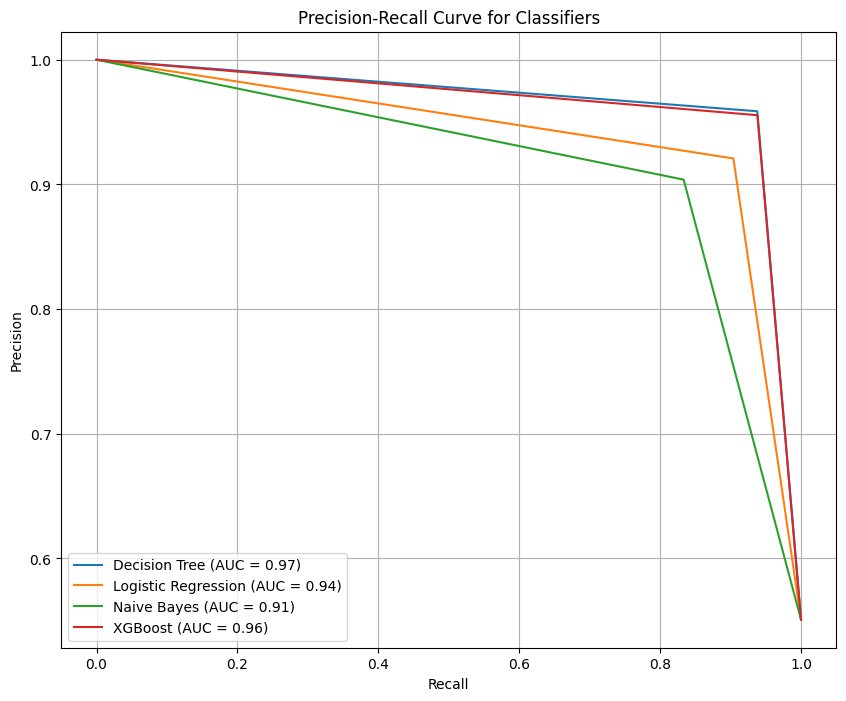

In [79]:
# Define a dictionary to store classifiers
classifiers = {
    'Decision Tree': best_dt_classifier,
    'Logistic Regression': best_log_reg,
    'Naive Bayes': nb_classifier,
    'XGBoost': model
}

# Create a figure for PR curves
plt.figure(figsize=(10, 8))

# Iterate through each classifier and plot its PR curve
for clf_name, clf in classifiers.items():
    # Make predictions on the test set to obtain probabilities
    y_prob = clf.predict(X_test)
    # Extract probabilities for the positive class
    if len(y_prob.shape) > 1 and y_prob.shape[1] > 1:
        y_prob_positive = y_prob[:, 1]  # If probabilities for each class are available
    else:
        y_prob_positive = y_prob

    # Compute precision-recall curve
    precision, recall, _ = precision_recall_curve(y_test, y_prob_positive)

    # Calculate PR AUC score
    pr_auc = auc(recall, precision)

    # Plot PR curve for each classifier
    plt.plot(recall, precision, label=f'{clf_name} (AUC = {pr_auc:.2f})')

# Add labels and title to the plot
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Classifiers')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

**Principal Component Analysis (PCA)**


In [80]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

In [81]:
X_train_temp=X_train.copy()
X_test_temp=X_test.copy()
y_train_temp=y_train.copy()
y_test_temp=y_test.copy()

In [82]:
#Initially ,assign the number of components to "None"
pca_temp = PCA(n_components=None)
X_train_temp = pca_temp.fit_transform(X_train_temp)
X_test_temp= pca_temp.transform(X_test_temp)

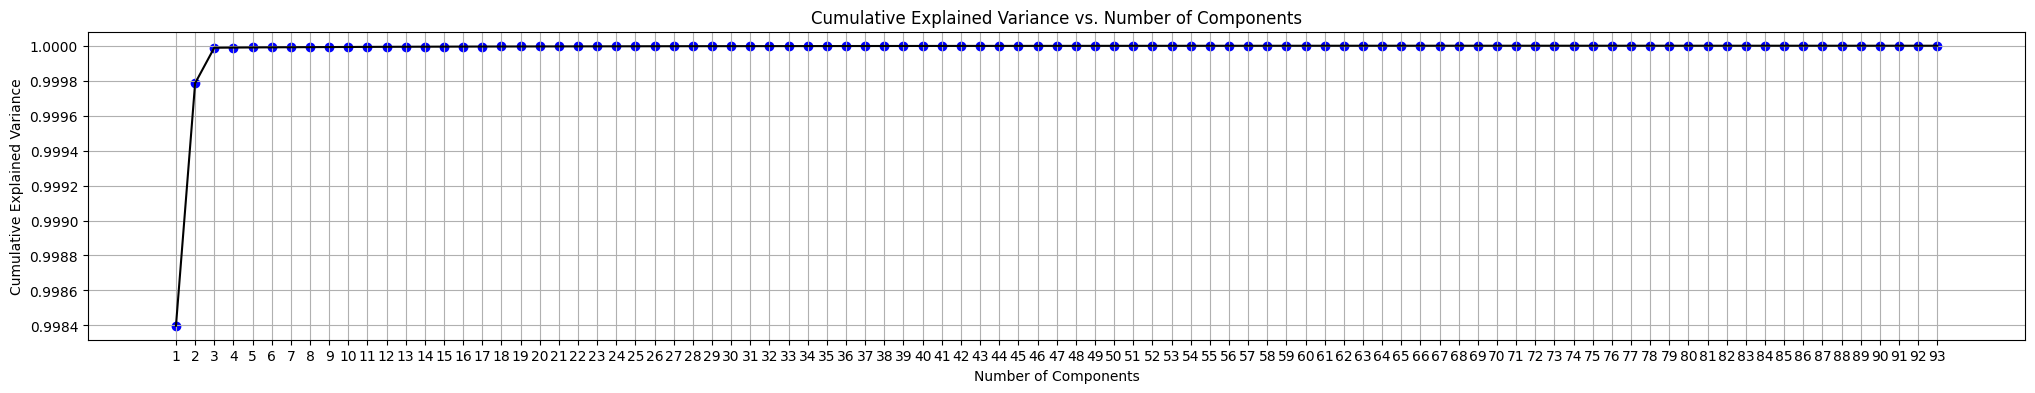

In [86]:
# Variance ratio
explained_variance_ratio = pca_temp.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Visualize the Feature size importance
plt.figure(figsize=(25, 4))
plt.scatter(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, color="blue")
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, color="black")
plt.xticks(range(1, len(cumulative_explained_variance) + 1))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()


In [87]:
#PCA
pca= PCA(n_components=None)
X_train_transformed= pca.fit_transform(X_train)
X_test_transformed= pca.transform(X_test)

In [88]:
# Logistic Regression
log_reg = LogisticRegression()

# Define the parameter grid for GridSearchCV
param_grid_logreg = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Perform GridSearchCV to find the best parameters
grid_search_logreg = GridSearchCV(estimator=log_reg, param_grid=param_grid_logreg, scoring='accuracy', cv=5)
grid_search_logreg.fit(X_train_transformed, y_train)

# Get the best Logistic Regression model with optimal parameters
best_log_reg = grid_search_logreg.best_estimator_

# Evaluate the best model on the test set
y_pred_logreg = best_log_reg.predict(X_test_transformed)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [89]:
confusion_matrix(y_test,y_pred_logreg)

array([[10521,  1110],
       [ 1370, 12897]])

In [90]:
print(classification_report(y_test,y_pred_logreg))

              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89     11631
         1.0       0.92      0.90      0.91     14267

    accuracy                           0.90     25898
   macro avg       0.90      0.90      0.90     25898
weighted avg       0.90      0.90      0.90     25898



In [91]:
dt_classifier = DecisionTreeClassifier()

# Define the parameter grid for GridSearchCV
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV to find the best parameters
grid_search_dt = GridSearchCV(estimator=dt_classifier, param_grid=param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train_transformed, y_train)

# Get the best Decision Tree classifier with optimal parameters
best_dt_classifier = grid_search_dt.best_estimator_

# Predict on the test set and evaluate performance
y_pred_dt = best_dt_classifier.predict(X_test_transformed)

In [92]:
confusion_matrix(y_test,y_pred_dt)

array([[10396,  1235],
       [ 1431, 12836]])

In [93]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

         0.0       0.88      0.89      0.89     11631
         1.0       0.91      0.90      0.91     14267

    accuracy                           0.90     25898
   macro avg       0.90      0.90      0.90     25898
weighted avg       0.90      0.90      0.90     25898



In [97]:
parameter_space = \
    {
        "max_depth": [4, 5, 6],
        "learning_rate": [0.005, 0.009, 0.01],
        "n_estimators": [700, 1000, 2500],
        "booster": ["gbtree",],
        "gamma": [7, 25, 100],
        "subsample": [0.3, 0.6],
        "colsample_bytree": [0.5, 0.7],
        "colsample_bylevel": [0.5, 0.7,],
        "reg_alpha": [1, 10, 33],
        "reg_lambda": [1, 3, 10],
    }

clf = RandomizedSearchCV(XGBClassifier(random_state=3),
                         parameter_space, cv=5, n_jobs=4,
                         scoring="accuracy",
                         random_state=3, n_iter=10)

clf.fit(X_train_transformed, y_train)
print("Best parameters:")
print(clf.best_params_)

Best parameters:
{'subsample': 0.6, 'reg_lambda': 3, 'reg_alpha': 10, 'n_estimators': 2500, 'max_depth': 6, 'learning_rate': 0.005, 'gamma': 7, 'colsample_bytree': 0.5, 'colsample_bylevel': 0.7, 'booster': 'gbtree'}


In [98]:
model = XGBClassifier(**clf.best_params_)
model.fit(X_train_transformed, y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=0.7, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=7, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.005, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=2500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [99]:
preds = model.predict(X_test_transformed)

In [100]:
confusion_matrix(y_test,preds)

array([[10943,   688],
       [  942, 13325]])

In [101]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93     11631
         1.0       0.95      0.93      0.94     14267

    accuracy                           0.94     25898
   macro avg       0.94      0.94      0.94     25898
weighted avg       0.94      0.94      0.94     25898



In [94]:
from sklearn.naive_bayes import GaussianNB
# Define the Naive Bayes (GaussianNB) classifier
nb_classifier = GaussianNB()

# No hyperparameter tuning for Naive Bayes, use default settings

# Train the classifier on the resampled training data
nb_classifier.fit(X_train_transformed, y_train)

# Predict on the test set and evaluate performance
y_pred_nb = nb_classifier.predict(X_test_transformed)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [95]:
confusion_matrix(y_test,y_pred_nb)

array([[ 9887,  1744],
       [ 3065, 11202]])

In [96]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

         0.0       0.76      0.85      0.80     11631
         1.0       0.87      0.79      0.82     14267

    accuracy                           0.81     25898
   macro avg       0.81      0.82      0.81     25898
weighted avg       0.82      0.81      0.81     25898



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


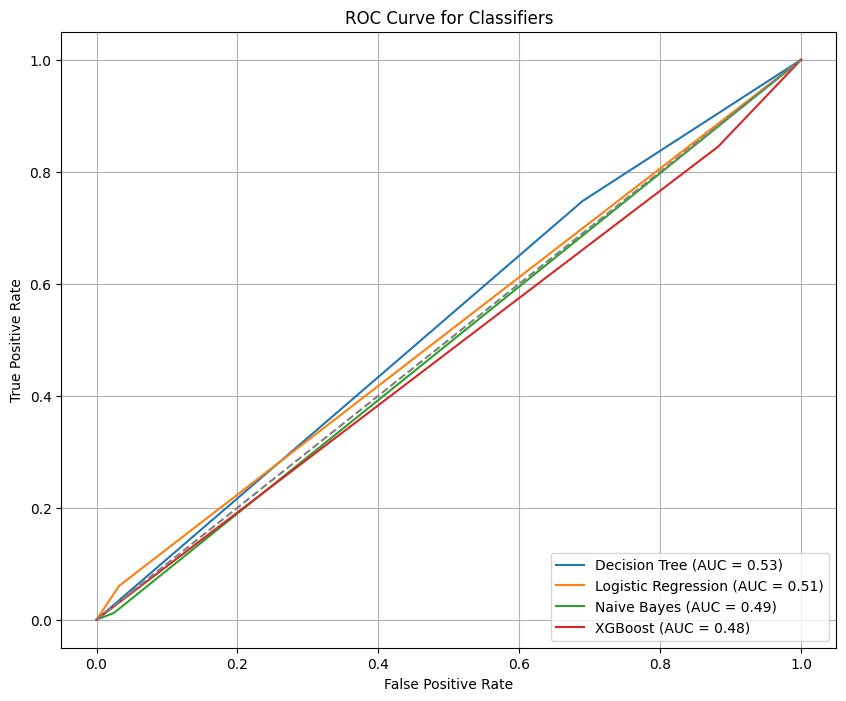

In [102]:
# Define a dictionary to store classifiers
classifiers = {
    'Decision Tree': best_dt_classifier,
    'Logistic Regression': best_log_reg,

    'Naive Bayes': nb_classifier,
    'XGBoost': model

}

# Create a figure for ROC curves
plt.figure(figsize=(10, 8))

# Iterate through each classifier and plot its ROC curve
for clf_name, clf in classifiers.items():
    # Make predictions on the test set to obtain probabilities
    y_prob = clf.predict(X_test)
    # Extract probabilities for the positive class
    if len(y_prob.shape) > 1 and y_prob.shape[1] > 1:
        y_prob_positive = y_prob[:, 1]  # If probabilities for each class are available
    else:
        y_prob_positive = y_prob
    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob_positive)

    # Calculate ROC AUC score
    roc_auc = roc_auc_score(y_test, y_prob)

    # Plot ROC curve for each classifier
    plt.plot(fpr, tpr, label=f'{clf_name} (AUC = {roc_auc:.2f})')

# Plot the diagonal (random guess line)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Add labels and title to the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Classifiers')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


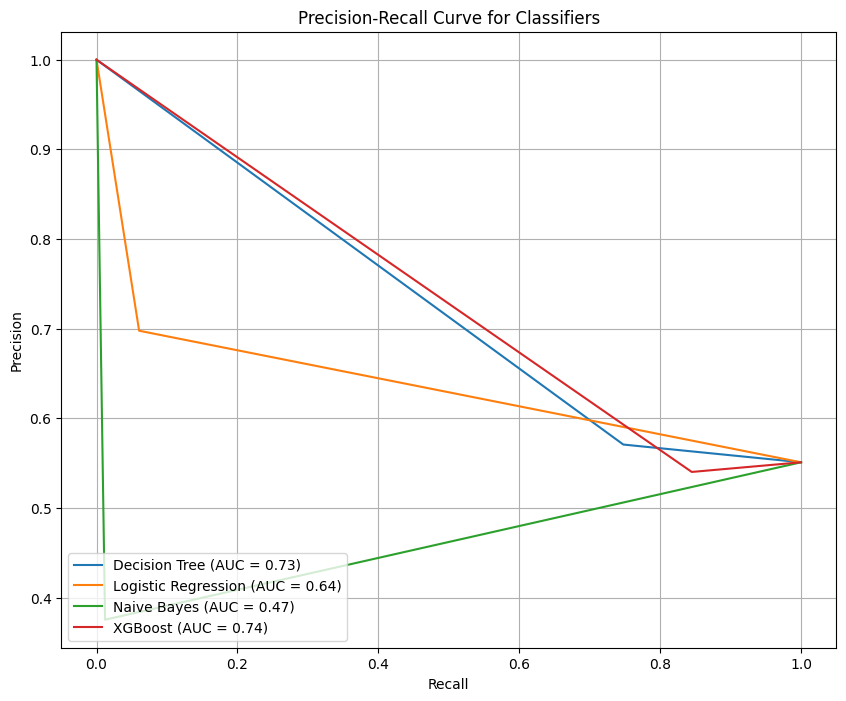

In [103]:
# Define a dictionary to store classifiers
classifiers = {
    'Decision Tree': best_dt_classifier,
    'Logistic Regression': best_log_reg,

    'Naive Bayes': nb_classifier,
    'XGBoost': model

}

# Create a figure for PR curves
plt.figure(figsize=(10, 8))

# Iterate through each classifier and plot its PR curve
for clf_name, clf in classifiers.items():
    # Make predictions on the test set to obtain probabilities
    y_prob = clf.predict(X_test)
    # Extract probabilities for the positive class
    if len(y_prob.shape) > 1 and y_prob.shape[1] > 1:
        y_prob_positive = y_prob[:, 1]  # If probabilities for each class are available
    else:
        y_prob_positive = y_prob

    # Compute precision-recall curve
    precision, recall, _ = precision_recall_curve(y_test, y_prob_positive)

    # Calculate PR AUC score
    pr_auc = auc(recall, precision)

    # Plot PR curve for each classifier
    plt.plot(recall, precision, label=f'{clf_name} (AUC = {pr_auc:.2f})')

# Add labels and title to the plot
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Classifiers')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()